In [1]:
import pandas as pd

combined_file_path = "C:/Users/coolb/Desktop/SarBERT/GenerativeAI_labeled_combined.csv"
df_combined = pd.read_csv(combined_file_path)

print(df_combined.head())

   Unnamed: 0                   Datetime             Tweet Id  \
0           0  2023-04-19 21:27:19+00:00  1648800467206672384   
1           1  2023-04-19 21:27:09+00:00  1648800425540476929   
2           2  2023-04-19 21:26:57+00:00  1648800376479715328   
3           3  2023-04-19 21:26:49+00:00  1648800341193027584   
4           4  2023-04-19 21:25:00+00:00  1648799883934203905   

                                                Text       Username  \
0  From Studio Gangster to Synthetic Gangster 🎤.....     resembleai   
1  Took me some time to find this. I build this #...  devaanparbhoo   
2  Mind blowing next wave #generativeai  platform...        timreha   
3  Open Source Generative AI Image Specialist Sta...     VirtReview   
4  Are you an #HR leader considering which future...      FrozeElle   

                                        cleaned_text sentiment_roberta  \
0  studio gangster synthetic gangster investigate...           neutral   
1  took time find build nocode pro

In [2]:
sentiment_counts_roberta = df_combined['sentiment_roberta'].value_counts()
sentiment_counts_vader = df_combined['sentiment_vader'].value_counts()

print("RoBERTa Sentiment Counts:\n", sentiment_counts_roberta)
print("\nVADER Sentiment Counts:\n", sentiment_counts_vader)

RoBERTa Sentiment Counts:
 sentiment_roberta
positive    6492241
neutral      245395
negative       1983
Name: count, dtype: int64

VADER Sentiment Counts:
 sentiment_vader
positive    6537649
neutral      178036
negative      23934
Name: count, dtype: int64



Sentiment Agreement Counts:
 sentiment_agreement
Identical    6548086
Different     191533
Name: count, dtype: int64


C:\Users\Sarb\AppData\Local\Temp\ipykernel_12848\570707605.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_agreement', data=df_combined, palette='viridis', order=['Identical', 'Different'])


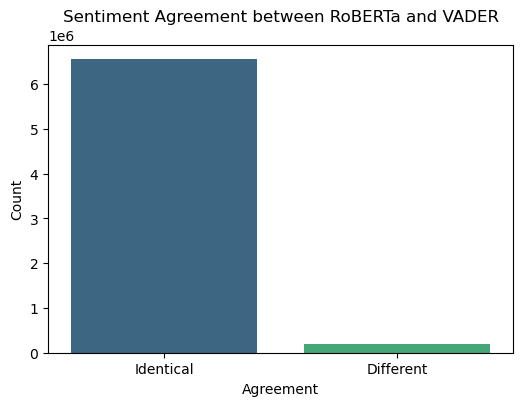

In [11]:
df_combined = pd.read_csv(combined_file_path)
df_combined['sentiment_agreement'] = df_combined['sentiment_roberta'] == df_combined['sentiment_vader']
df_combined['sentiment_agreement'] = df_combined['sentiment_agreement'].map({True: 'Identical', False: 'Different'})
agreement_count = df_combined['sentiment_agreement'].value_counts()

print("\nSentiment Agreement Counts:\n", agreement_count)

plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment_agreement', data=df_combined, palette='viridis', order=['Identical', 'Different'])
plt.title('Sentiment Agreement between RoBERTa and VADER')
plt.xlabel('Agreement')
plt.ylabel('Count')
plt.show()

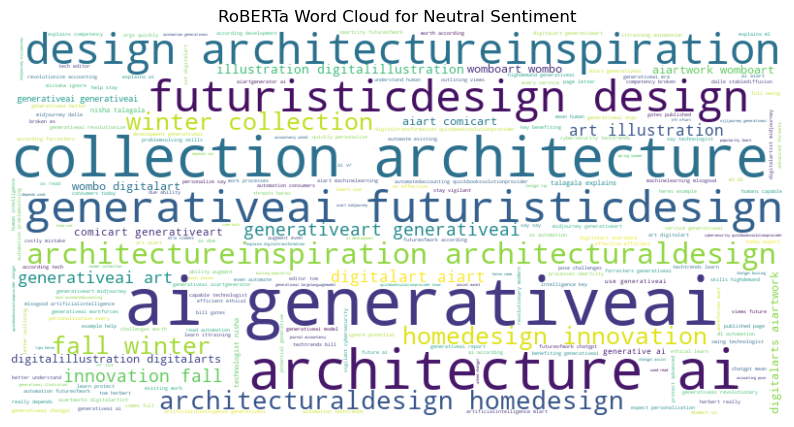

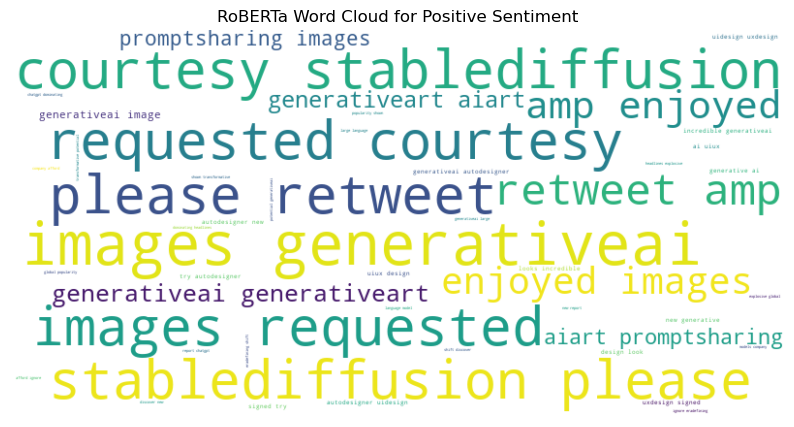

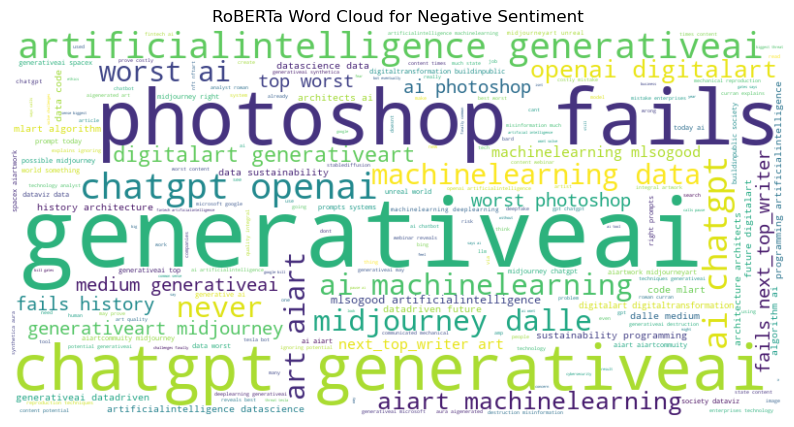

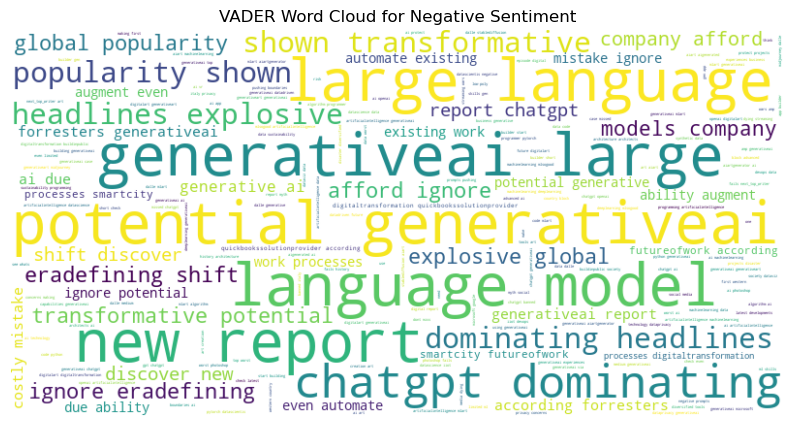

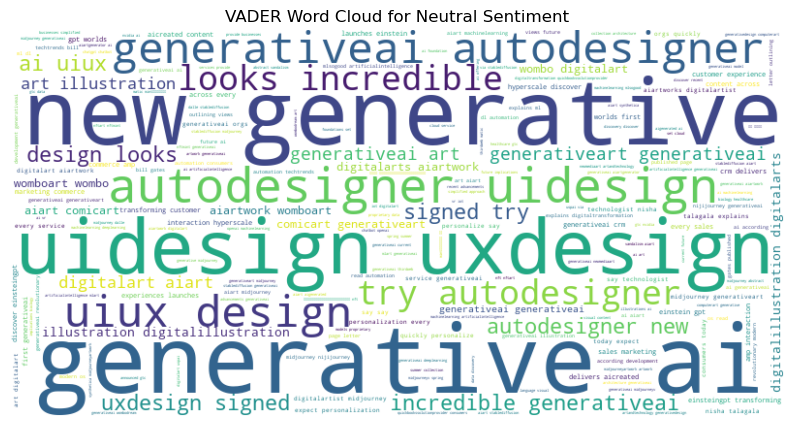

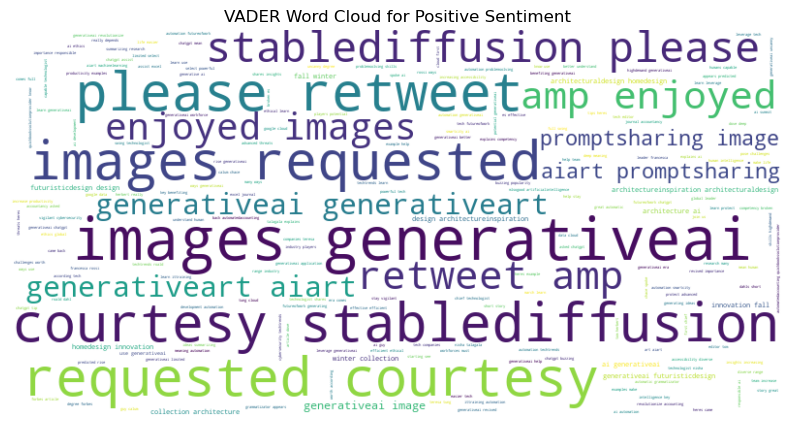

In [5]:
from wordcloud import WordCloud

for sentiment in df_combined['sentiment_roberta'].unique():
    sentiment_text_roberta = ' '.join(df_combined[df_combined['sentiment_roberta'] == sentiment]['cleaned_text'].tolist())
    wordcloud_roberta = WordCloud(width=800, height=400, background_color='white').generate(sentiment_text_roberta)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud_roberta, interpolation='bilinear')
    plt.title(f'RoBERTa Word Cloud for {sentiment.capitalize()} Sentiment')
    plt.axis('off')
    plt.show()

for sentiment in df_combined['sentiment_vader'].unique():
    sentiment_text_vader = ' '.join(df_combined[df_combined['sentiment_vader'] == sentiment]['cleaned_text'].tolist())
    wordcloud_vader = WordCloud(width=800, height=400, background_color='white').generate(sentiment_text_vader)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud_vader, interpolation='bilinear')
    plt.title(f'VADER Word Cloud for {sentiment.capitalize()} Sentiment')
    plt.axis('off')
    plt.show()

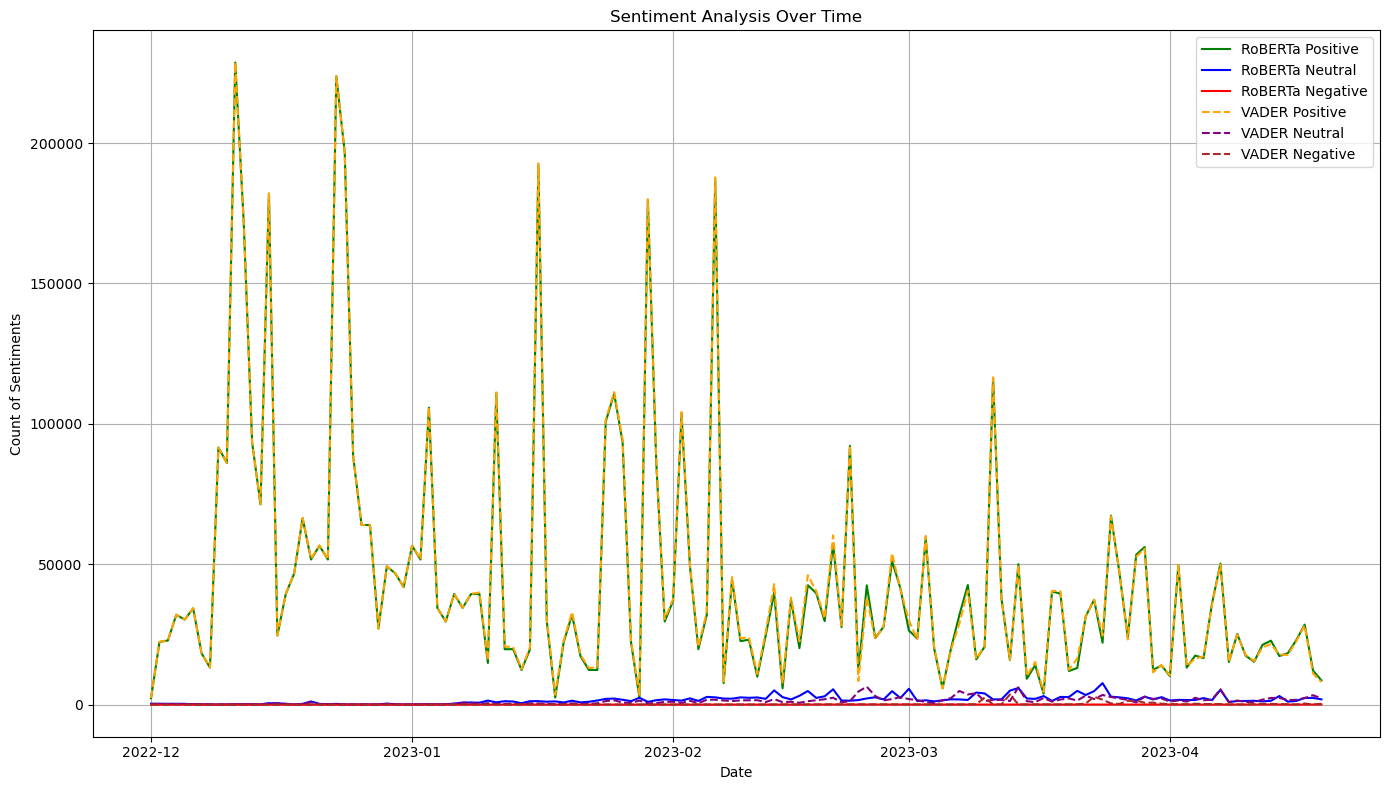

In [7]:
df_combined = pd.read_csv(combined_file_path)
df_combined['Date'] = pd.to_datetime(df_combined['Datetime']).dt.date
df_combined = df_combined[df_combined['Date'] >= pd.to_datetime('2022-12-01').date()]


roberta_counts = df_combined.groupby(['Date', 'sentiment_roberta']).size().unstack(fill_value=0)
vader_counts = df_combined.groupby(['Date', 'sentiment_vader']).size().unstack(fill_value=0)
combined_counts = pd.concat([roberta_counts, vader_counts], axis=1, keys=['RoBERTa', 'VADER'])

plt.figure(figsize=(14, 8))
plt.plot(combined_counts.index, combined_counts['RoBERTa']['positive'], label='RoBERTa Positive', color='green')
plt.plot(combined_counts.index, combined_counts['RoBERTa']['neutral'], label='RoBERTa Neutral', color='blue')
plt.plot(combined_counts.index, combined_counts['RoBERTa']['negative'], label='RoBERTa Negative', color='red')
plt.plot(combined_counts.index, combined_counts['VADER']['positive'], label='VADER Positive', color='orange', linestyle='--')
plt.plot(combined_counts.index, combined_counts['VADER']['neutral'], label='VADER Neutral', color='purple', linestyle='--')
plt.plot(combined_counts.index, combined_counts['VADER']['negative'], label='VADER Negative', color='brown', linestyle='--')

plt.title('Sentiment Analysis Over Time')
plt.xlabel('Date')
plt.ylabel('Count of Sentiments')
plt.legend()
plt.grid(True)
plt.tight_layout()


plt.show()

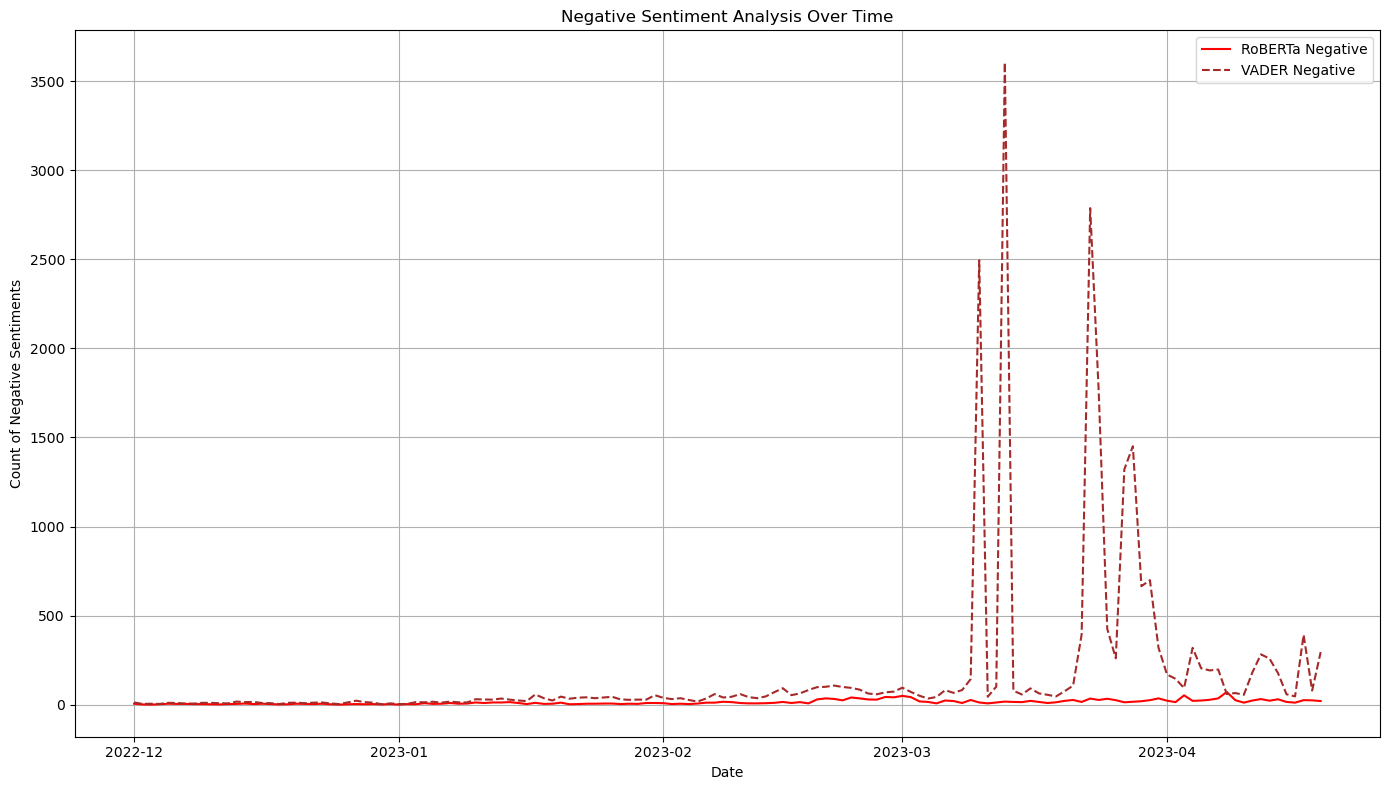

In [8]:
df_combined = pd.read_csv(combined_file_path)
df_combined['Date'] = pd.to_datetime(df_combined['Datetime']).dt.date
df_combined = df_combined[df_combined['Date'] >= pd.to_datetime('2022-12-01').date()]

roberta_counts = df_combined.groupby(['Date', 'sentiment_roberta']).size().unstack(fill_value=0)
vader_counts = df_combined.groupby(['Date', 'sentiment_vader']).size().unstack(fill_value=0)
combined_counts = pd.concat([roberta_counts, vader_counts], axis=1, keys=['RoBERTa', 'VADER'])

plt.figure(figsize=(14, 8))
plt.plot(combined_counts.index, combined_counts['RoBERTa']['negative'], label='RoBERTa Negative', color='red')
plt.plot(combined_counts.index, combined_counts['VADER']['negative'], label='VADER Negative', color='brown', linestyle='--')
plt.title('Negative Sentiment Analysis Over Time')
plt.xlabel('Date')
plt.ylabel('Count of Negative Sentiments')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [10]:
df_combined = pd.read_csv(combined_file_path)
df_combined['Datetime'] = pd.to_datetime(df_combined['Datetime'], utc=True)
df_combined['YearMonth'] = df_combined['Datetime'].dt.to_period('M')
start_date = pd.Timestamp('2022-12-01', tz='UTC')
df_combined = df_combined[df_combined['Datetime'] >= start_date]

negative_counts = df_combined[df_combined['sentiment_roberta'] == 'negative'].groupby('YearMonth').size().reset_index(name='Negative Tweets RoBERTa')
negative_counts_vader = df_combined[df_combined['sentiment_vader'] == 'negative'].groupby('YearMonth').size().reset_index(name='Negative Tweets VADER')
negative_counts_combined = pd.merge(negative_counts, negative_counts_vader, on='YearMonth', how='outer').fillna(0)
negative_counts_combined['YearMonth'] = negative_counts_combined['YearMonth'].astype(str)

print(negative_counts_combined)

C:\Users\Sarb\AppData\Local\Temp\ipykernel_12848\135797608.py:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_combined['YearMonth'] = df_combined['Datetime'].dt.to_period('M')


  YearMonth  Negative Tweets RoBERTa  Negative Tweets VADER
0   2022-12                       90                    287
1   2023-01                      200                    854
2   2023-02                      499                   1712
3   2023-03                      632                  17562
4   2023-04                      502                   3267
